# Lecture NB - Phillips Rule

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datascience import * 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import curve_fit
import math
from math import *
import seaborn as sns
import itertools
%matplotlib inline

**Learning Objectives:**  
In this notebook, we will download macroeconomic data and examine how the models and theories we discussed in lecture fit with these real life data. 

## Macroeconomic Indicators and Data

In [2]:
macroeconomics = pd.read_csv('macro88.csv')
macroeconomics.head() 

,Unnamed: 0,DATE,GDPC1_lin,GDPC1_pc1,CPIAUCSL_pc1,UNRATE_lin,DFF_lin,CPILFESL_pc1,NROU
0,0,1958-01-01,2908.281,-2.87143,3.45614,6.3,1.87,2.80,5.414240
1,1,1958-04-01,2927.395,-2.01841,3.27225,7.4,0.94,2.43,5.418266
2,2,1958-07-01,2995.112,-0.72480,2.29980,7.3,1.32,2.07,5.422658
3,3,1958-10-01,3065.141,2.65814,1.91315,6.4,2.16,1.82,5.427429
4,4,1959-01-01,3123.978,7.41665,0.89317,5.8,2.58,1.81,5.432577


---

### Macroeconomics Indicators and their Time Series
In this section, we will see how the value of each macroeconomic indicator varied from 1958 to present. 

In [3]:
series_names = {"GDPC1_lin": "GDP", 
               "GDPC1_pc1": "GDP Growth", 
               "CPIAUCSL_pc1": "Inflation", 
               "UNRATE_lin": "Unemployment Rate", 
               "DFF_lin": "Fed Funds Rate", 
               "CPILFESL_pc1": "Core Inflation Rate", 
               "NROU": "Noncyclical Rate of Unemployment" # aka NAIRU, Natural Rate of Unemployment (Long-term)
              }


## Phillips Curve
Phillips Curve describes a negative relationship between inflation and unemployment. 

$$ \pi = - f(u)$$

where $\pi$ is the inflation rate, $u$ is the unemployment rate. 

**Let's first create a dataframe with relevant data, i.e. inflation rate and unemployment rate.**

In [4]:
phillips_curve = macroeconomics[["DATE", "UNRATE_lin", "CPILFESL_pc1", "NROU"]].copy()
phillips_curve["decade"] = phillips_curve["DATE"].apply(lambda date: int(date[:4]) // 10 * 10)
phillips_curve.set_index("DATE", inplace=True)
phillips_curve = phillips_curve.apply(pd.to_numeric)
phillips_curve.head()

,UNRATE_lin,CPILFESL_pc1,NROU,decade
DATE,,,,
1958-01-01,6.3,2.80,5.414240,1950
1958-04-01,7.4,2.43,5.418266,1950
1958-07-01,7.3,2.07,5.422658,1950
1958-10-01,6.4,1.82,5.427429,1950
1959-01-01,5.8,1.81,5.432577,1950


Friendly note: you should not use this piece of code for your lab, because the dataframe is slightly different!

### Empirical Relationship

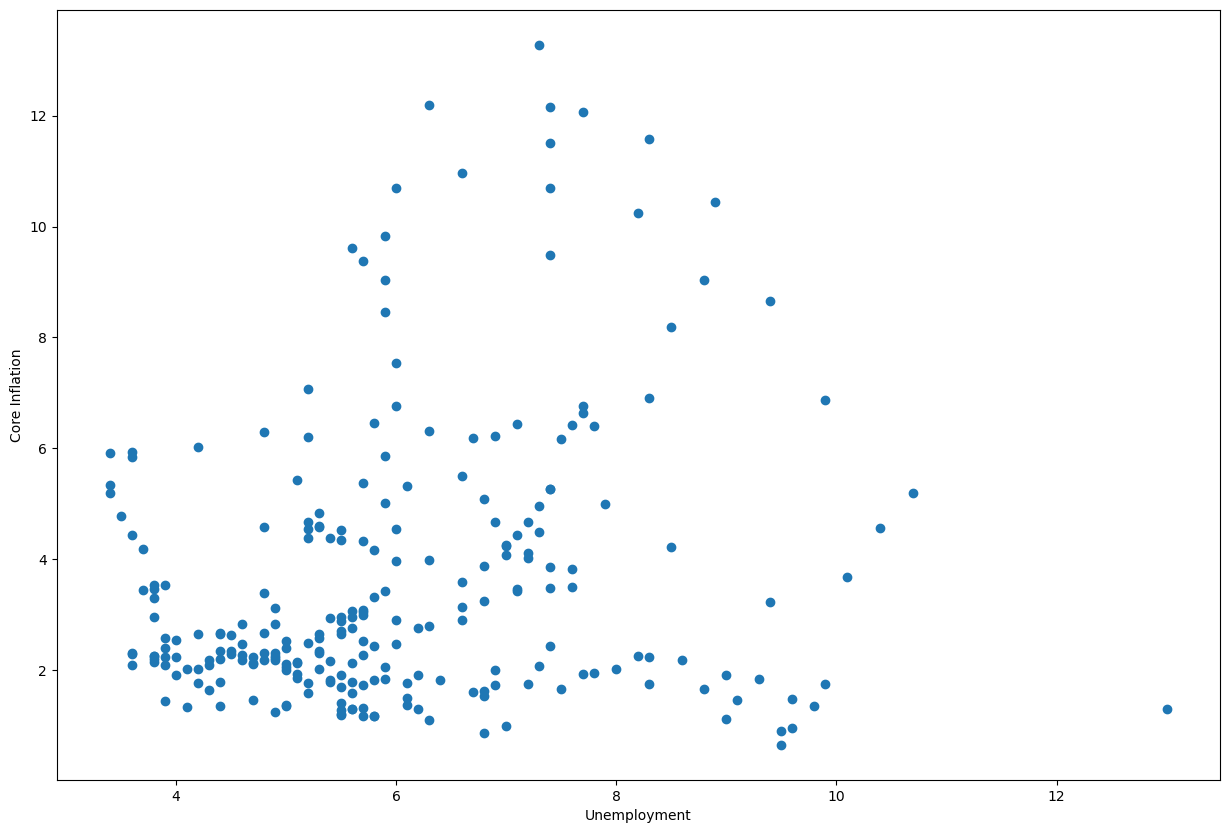

In [5]:
plt.figure(figsize=(15, 10))
plt.scatter(x=phillips_curve["UNRATE_lin"], y=phillips_curve["CPILFESL_pc1"])
plt.xlabel("Unemployment")
plt.ylabel("Core Inflation")
plt.show()

**Now we will try a fit a curve to the empirical data of unemployment and core inflation.** 

In [10]:
unique_vals = pd.DataFrame([[k,v.values] for k,v in phillips_curve.groupby('UNRATE_lin').groups.items()], 
                      columns=['UNRATE_lin','indices'])
unique_vals["indices"] = unique_vals["indices"].apply(lambda item: item[0])
unique_vals["CPILFESL_pc1"] = unique_vals["indices"].apply(lambda item: phillips_curve.loc[item, "CPILFESL_pc1"])
unique_vals["NROU"] = unique_vals["indices"].apply(lambda item: phillips_curve.loc[item, "NROU"])
unique_vals["decade"] = unique_vals["indices"].apply(lambda item: phillips_curve.loc[item, "decade"])
unique_vals.set_index("indices", inplace=True)
unique_vals.head()

,UNRATE_lin,CPILFESL_pc1,NROU,decade
indices,,,,
1968-10-01,3.4,5.20,5.826905,1960
1968-07-01,3.5,4.78,5.815176,1960
1968-04-01,3.6,4.44,5.803658,1960
1966-10-01,3.7,3.44,5.734915,1960
1966-04-01,3.8,2.14,5.710529,1960


In [11]:
def aesthetic_pc(x, a):
    return a / x

In [12]:
popt, _ = curve_fit(aesthetic_pc, unique_vals["UNRATE_lin"], unique_vals["CPILFESL_pc1"])

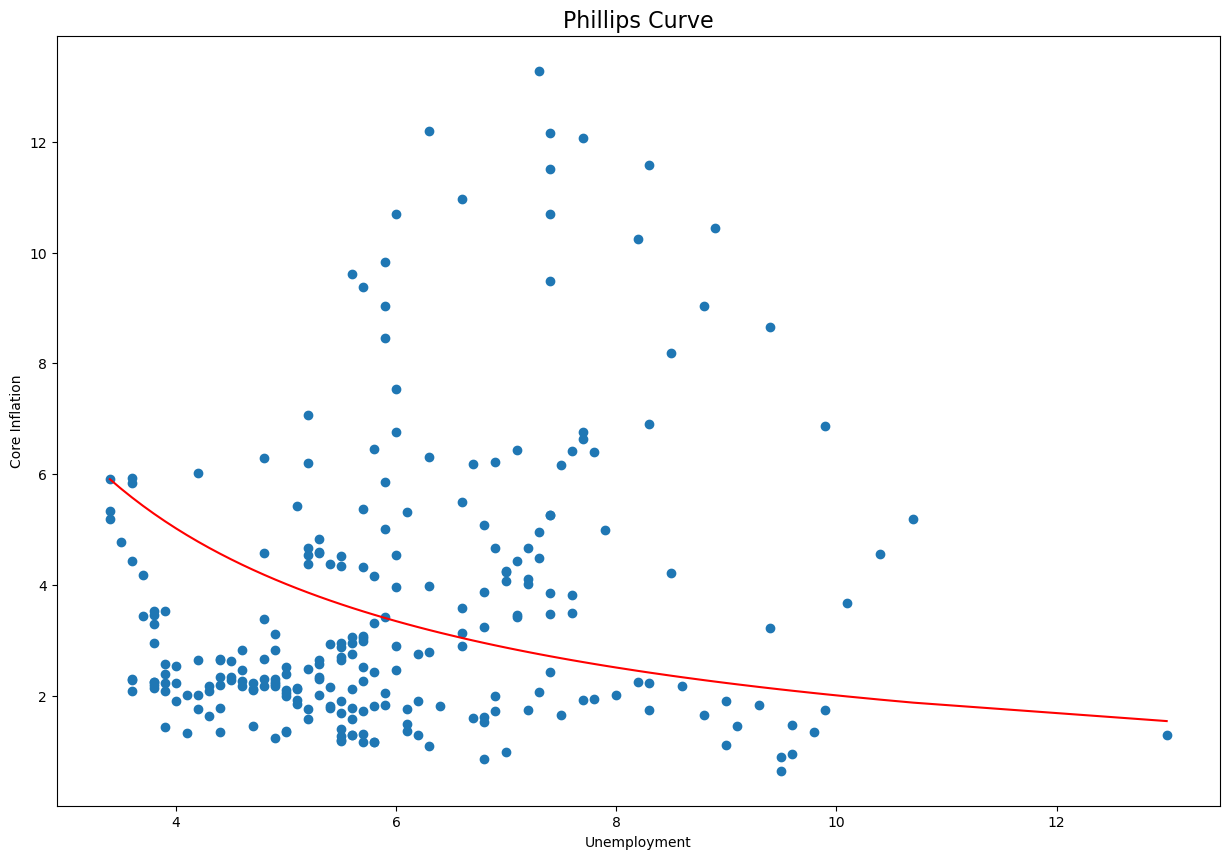

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(unique_vals["UNRATE_lin"], aesthetic_pc(unique_vals["UNRATE_lin"], *popt), color="red")
plt.scatter(x=phillips_curve["UNRATE_lin"], y=phillips_curve["CPILFESL_pc1"])
plt.xlabel("Unemployment")
plt.ylabel("Core Inflation")
plt.title("Phillips Curve", fontsize=16)
plt.show()

### Empirical Relationship Overtime
How does the empirical Phillips Curve change over time?

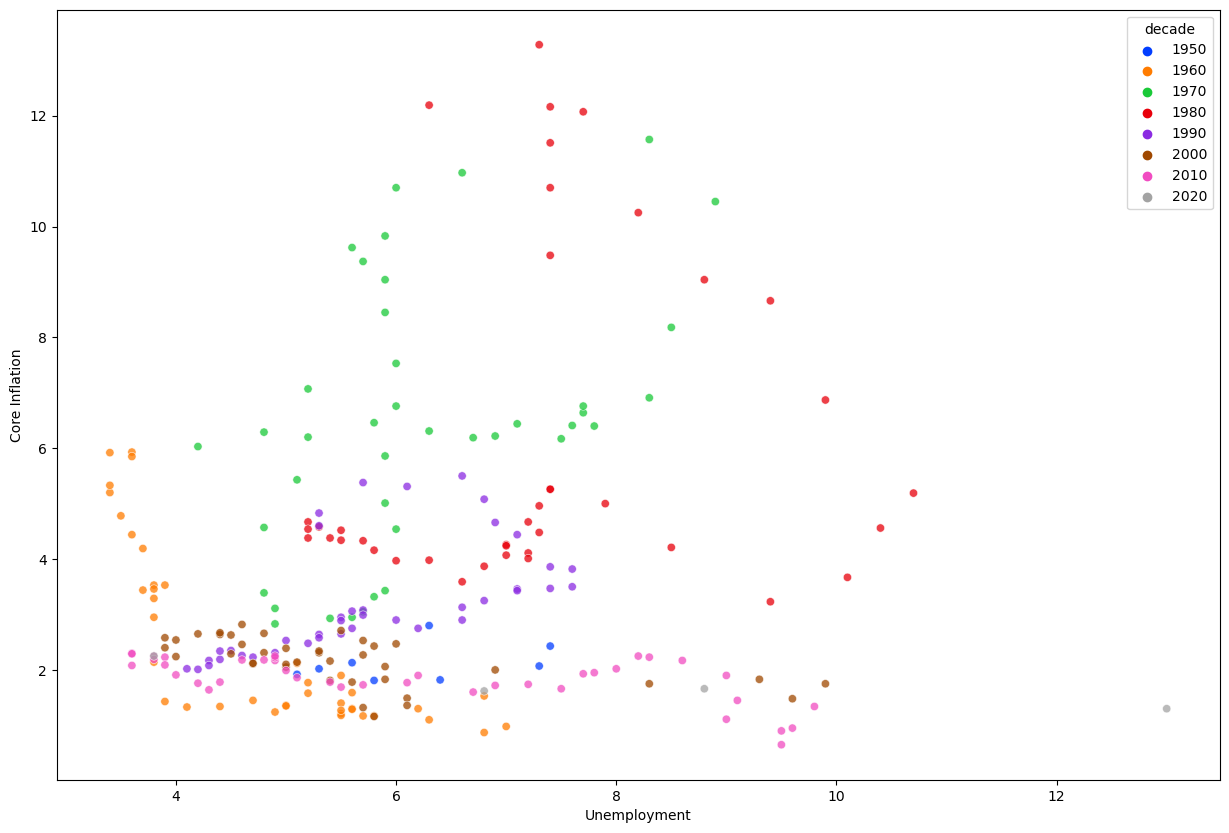

In [14]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="UNRATE_lin", y="CPILFESL_pc1", data=phillips_curve, 
                hue="decade", palette="bright", alpha=0.75)
plt.xlabel("Unemployment")
plt.ylabel("Core Inflation")
plt.show()

To show this more clearly, try toggling the widgets!

In [15]:
def plot_subset(start, length):
    start_str = str(start) + "-01-01"
    end_str = str(start + length) + "-01-01"
    
    subset = phillips_curve[(phillips_curve.index >= start_str) & (phillips_curve.index <= end_str)]
    
    plt.figure(figsize=(12, 8))
    plt.scatter(subset["UNRATE_lin"], subset["CPILFESL_pc1"])
    plt.xlim(3, 10)
    plt.ylim(0, 12)
    plt.xlabel("Unemployment Rate", fontsize=16)
    plt.ylabel("Inflation Rate", fontsize=16)
    plt.title(f"Time Period: {start} - {start + length}", fontsize=16)

l = widgets.RadioButtons(
    options=[5, 10, 20],
    value=5,
    description='Length:',
    disabled=False
)
s = widgets.IntSlider(min=1960, max=2020-l.value, step=2)

interact(plot_subset, start=s, length=l);

interactive(children=(IntSlider(value=1960, description='start', max=2015, min=1960, step=2), RadioButtons(des…

<div class="alert alert-info">
<b> What do you notice about the relationship between unemployment and inflation over time?
</div>

---